In [1]:
import pandas as pd

# ОПИС

Во овој податочен сет ние анализираме карактеристики на пациенти во табелата x и информации за тоа дали пациентите примиле терапија и кои се исходите од неа во табелата y

In [2]:
x = pd.read_csv("x.csv")

In [3]:
x

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58
0,29,C,1.0,7.0,60,85,0,0,1,0,...,0,0,0,0,0,0,0,0,45,39
1,27,C,0.0,0.0,64,178,0,0,0,0,...,0,0,0,0,0,0,0,0,46,42
2,27,C,0.0,0.0,60,102,0,0,0,0,...,1,0,0,0,0,0,0,0,45,40
3,37,C,0.0,0.0,65,174,0,0,0,0,...,0,0,0,0,0,0,0,0,47,40
4,24,C,20.0,14.0,63,129,0,0,0,0,...,2,0,0,0,0,0,0,0,47,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,21,C,0.0,0.0,67,140,0,0,2,0,...,0,0,0,0,0,0,0,1,47,39
4798,24,E,0.0,0.0,62,130,0,0,0,0,...,2,0,0,0,0,0,0,1,46,40
4799,33,C,5.0,15.0,63,137,0,0,0,0,...,0,0,0,0,0,0,0,0,46,38
4800,36,C,10.0,22.0,60,110,0,0,1,0,...,0,0,0,0,0,0,0,0,46,38


In [4]:
zymu1= pd.read_csv("zymu_1.csv")

In [5]:
zymu1

,z,y0,y1,mu0,mu1
0,0,3.157727,7.441336,3.890563,5.716108
1,0,4.281244,8.937312,5.870844,8.913574
2,0,7.621447,8.919930,7.006040,10.022676
3,1,-1.828240,4.015639,-1.046089,2.952779
4,0,-0.240268,5.296278,-0.478072,6.246069
...,...,...,...,...,...
4797,1,2.868927,6.861145,3.468946,5.867435
4798,1,4.512699,9.796457,4.827529,9.988942
4799,1,3.807379,10.910222,4.183918,9.469441
4800,1,5.168389,12.444005,4.684806,11.919826


In [6]:
pip install econml


In [7]:
import numpy as np
import pandas as pd
from econml.dml import LinearDML
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV, LogisticRegression
from econml.orf import DMLOrthoForest as CausalForest

In [8]:
zymu1['z'].value_counts()

,count
z,
0,3944
1,858


In [9]:
zymu1.isnull().sum()

,0
z,0
y0,0
y1,0
mu0,0
mu1,0


In [10]:
x.isnull().sum()

,0
x_1,0
x_2,0
x_3,0
x_4,0
x_5,0
x_6,0
x_7,0
x_8,0
x_9,0
x_10,0


# Во овој податочен сет ние немаме missing values

In [11]:
zymu1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   z       4802 non-null   int64  
 1   y0      4802 non-null   float64
 2   y1      4802 non-null   float64
 3   mu0     4802 non-null   float64
 4   mu1     4802 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 187.7 KB


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     4802 non-null   int64  
 1   x_2     4802 non-null   object 
 2   x_3     4802 non-null   float64
 3   x_4     4802 non-null   float64
 4   x_5     4802 non-null   int64  
 5   x_6     4802 non-null   int64  
 6   x_7     4802 non-null   int64  
 7   x_8     4802 non-null   int64  
 8   x_9     4802 non-null   int64  
 9   x_10    4802 non-null   int64  
 10  x_11    4802 non-null   int64  
 11  x_12    4802 non-null   int64  
 12  x_13    4802 non-null   int64  
 13  x_14    4802 non-null   int64  
 14  x_15    4802 non-null   int64  
 15  x_16    4802 non-null   int64  
 16  x_17    4802 non-null   int64  
 17  x_18    4802 non-null   int64  
 18  x_19    4802 non-null   int64  
 19  x_20    4802 non-null   int64  
 20  x_21    4802 non-null   object 
 21  x_22    4802 non-null   int64  
 22  

#  Претворање на категориските променливи од табелата x во нумерички вредности [x_2, x_21, x_24]

In [13]:
x['x_2'].value_counts()

,count
x_2,
C,4731
E,36
D,25
B,5
A,3
F,2


In [14]:
x['x_21'].value_counts()

,count
x_21,
J,2561
I,875
L,339
F,221
H,215
K,147
B,87
O,73
G,72


In [15]:
x['x_24'].value_counts()

,count
x_24,
E,3449
B,1273
D,52
A,18
C,10


# Ги енкодираме променливите со LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['x_2', 'x_21', 'x_24']

for col in categorical_cols:
    x[col] = le.fit_transform(x[col])

print(x['x_2'])
print("\n*********\n")
print(x['x_21'])
print("\n*********\n")
print(x['x_24'])

0       2
1       2
2       2
3       2
4       2
       ..
4797    2
4798    4
4799    2
4800    2
4801    2
Name: x_2, Length: 4802, dtype: int64

*********

0       9
1       9
2       9
3       9
4       9
       ..
4797    7
4798    7
4799    7
4800    7
4801    7
Name: x_21, Length: 4802, dtype: int64

*********

0       1
1       4
2       4
3       4
4       4
       ..
4797    1
4798    1
4799    1
4800    1
4801    1
Name: x_24, Length: 4802, dtype: int64


In [17]:
x

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58
0,29,2,1.0,7.0,60,85,0,0,1,0,...,0,0,0,0,0,0,0,0,45,39
1,27,2,0.0,0.0,64,178,0,0,0,0,...,0,0,0,0,0,0,0,0,46,42
2,27,2,0.0,0.0,60,102,0,0,0,0,...,1,0,0,0,0,0,0,0,45,40
3,37,2,0.0,0.0,65,174,0,0,0,0,...,0,0,0,0,0,0,0,0,47,40
4,24,2,20.0,14.0,63,129,0,0,0,0,...,2,0,0,0,0,0,0,0,47,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,21,2,0.0,0.0,67,140,0,0,2,0,...,0,0,0,0,0,0,0,1,47,39
4798,24,4,0.0,0.0,62,130,0,0,0,0,...,2,0,0,0,0,0,0,1,46,40
4799,33,2,5.0,15.0,63,137,0,0,0,0,...,0,0,0,0,0,0,0,0,46,38
4800,36,2,10.0,22.0,60,110,0,0,1,0,...,0,0,0,0,0,0,0,0,46,38


In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     4802 non-null   int64  
 1   x_2     4802 non-null   int64  
 2   x_3     4802 non-null   float64
 3   x_4     4802 non-null   float64
 4   x_5     4802 non-null   int64  
 5   x_6     4802 non-null   int64  
 6   x_7     4802 non-null   int64  
 7   x_8     4802 non-null   int64  
 8   x_9     4802 non-null   int64  
 9   x_10    4802 non-null   int64  
 10  x_11    4802 non-null   int64  
 11  x_12    4802 non-null   int64  
 12  x_13    4802 non-null   int64  
 13  x_14    4802 non-null   int64  
 14  x_15    4802 non-null   int64  
 15  x_16    4802 non-null   int64  
 16  x_17    4802 non-null   int64  
 17  x_18    4802 non-null   int64  
 18  x_19    4802 non-null   int64  
 19  x_20    4802 non-null   int64  
 20  x_21    4802 non-null   int64  
 21  x_22    4802 non-null   int64  
 22  

# Корелациска матрица за атрибутите

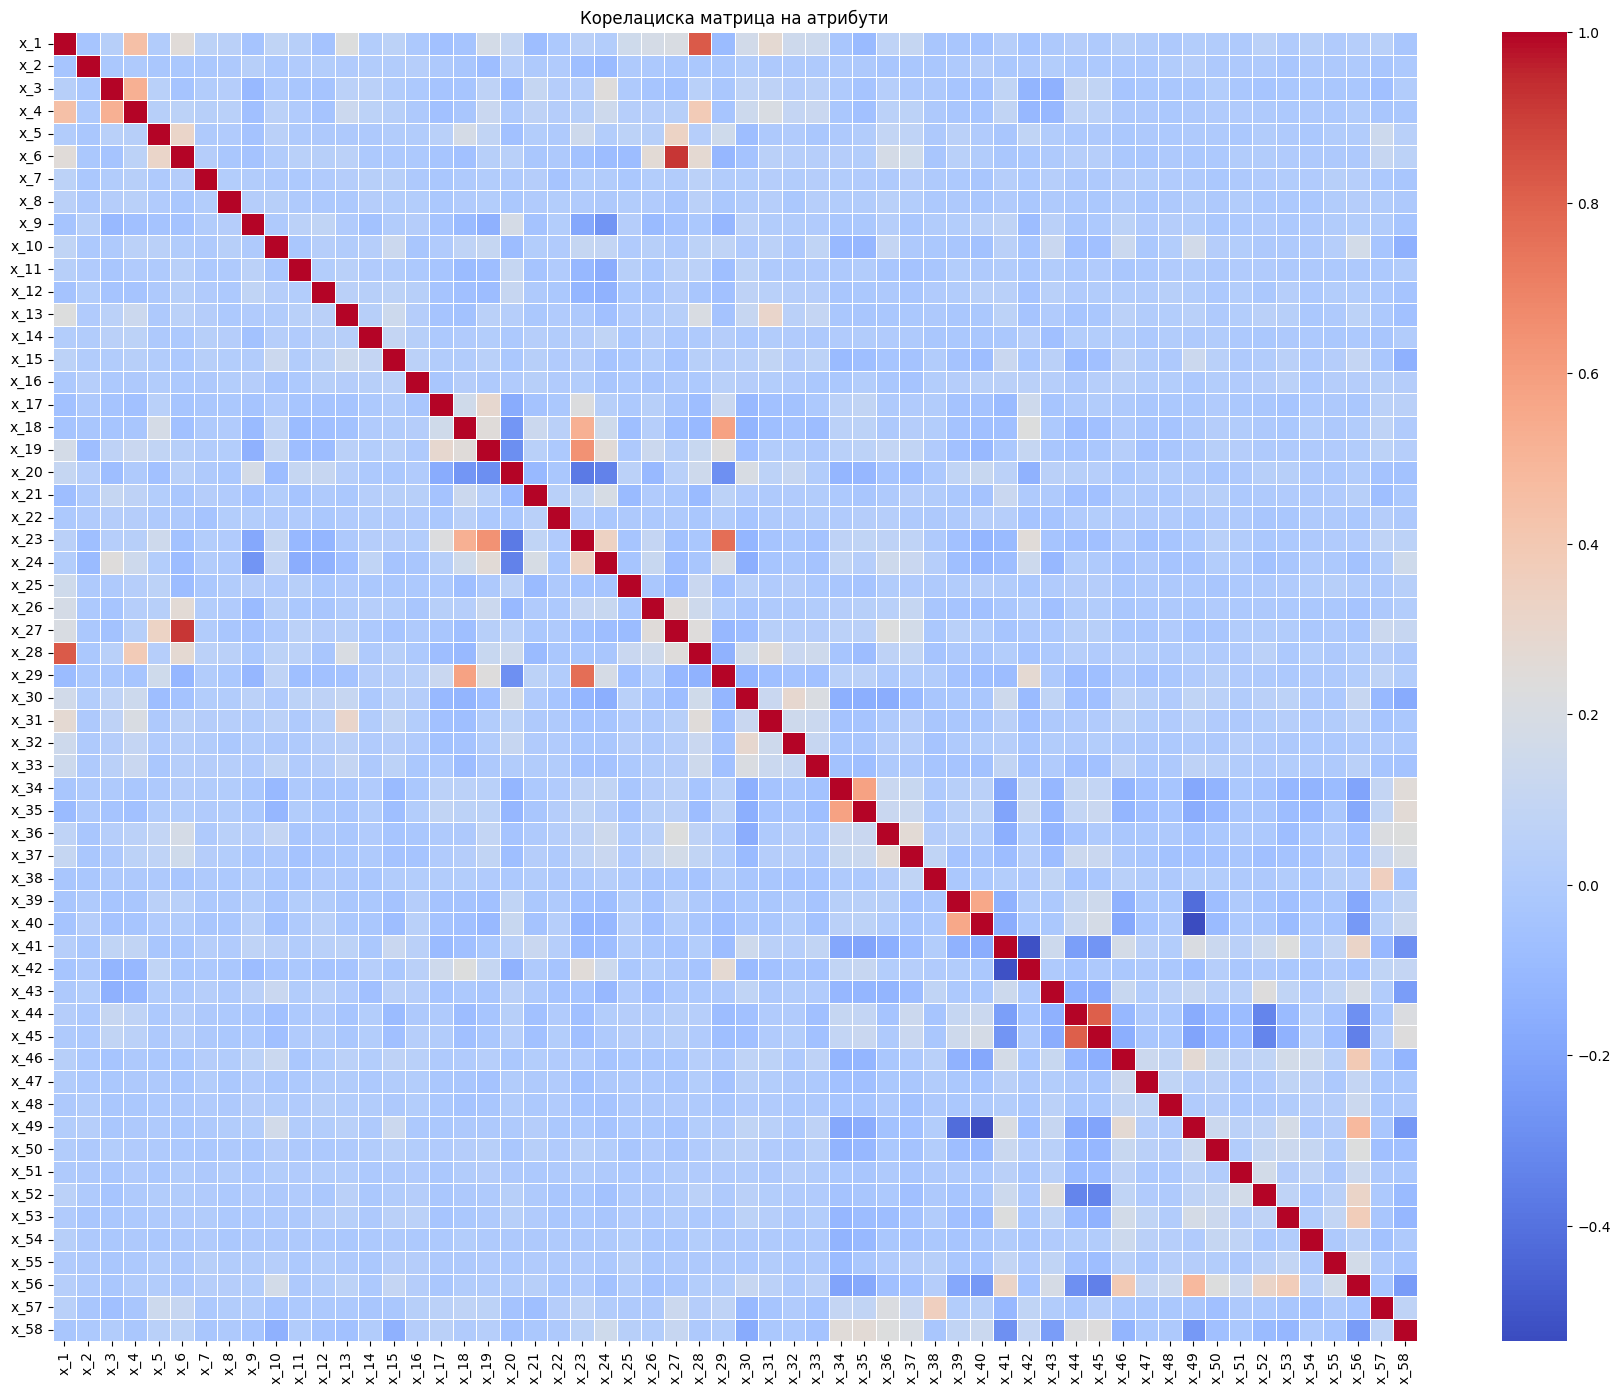

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22, 17))
correlation_matrix = x.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Корелациска матрица на атрибути')
plt.show()

In [20]:
correlation_matrix.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58
x_1,1.000000,-0.032238,0.037162,0.447350,0.012463,0.251463,0.061679,0.049682,-0.039306,0.082158,...,0.021342,0.014549,0.002058,0.055018,0.008223,0.036295,0.005620,0.034289,0.042359,-0.031269
x_2,-0.032238,1.000000,-0.018665,0.003246,-0.022410,-0.014945,-0.016968,-0.002187,0.039110,-0.012385,...,0.030095,-0.002070,-0.005226,0.000490,-0.029911,-0.004673,-0.006772,0.001556,-0.029524,-0.008338
x_3,0.037162,-0.018665,1.000000,0.521990,0.040630,-0.041974,0.010665,0.026700,-0.101103,0.000800,...,-0.023277,0.016609,-0.025022,-0.034465,-0.023684,-0.019056,-0.020508,-0.021181,-0.062485,0.012692
x_4,0.447350,0.003246,0.521990,1.000000,0.038376,0.060238,0.039126,0.046286,-0.065287,0.056144,...,-0.001952,0.009172,0.007651,0.002561,-0.007653,-0.005562,-0.010440,0.011489,-0.026671,-0.022355
x_5,0.012463,-0.022410,0.040630,0.038376,1.000000,0.310810,0.001824,0.009118,-0.043662,0.047556,...,0.003710,0.001220,-0.014263,0.015658,0.002629,-0.015637,0.014746,0.014472,0.141087,0.043467


In [21]:
threshold = 0.8
high_corr_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) > threshold:
                high_corr_pairs.append((col1, col2, corr_value))




In [22]:
for h in high_corr_pairs:
  print(str(h) + "\n")

('x_1', 'x_28', np.float64(0.8257853575075212))

('x_6', 'x_27', np.float64(0.9175910551943585))

('x_27', 'x_6', np.float64(0.9175910551943585))

('x_28', 'x_1', np.float64(0.8257853575075212))

('x_44', 'x_45', np.float64(0.8099290949222382))

('x_45', 'x_44', np.float64(0.8099290949222382))



# Парови кои се силно корелирани

Постојат повеќе парови кои се силно корелирани и ние ќе избришеме по една колона на секој од тие парови  

[x_1  со  x_28,

x_6   со  x_27,

x_44  со  x_45]

In [23]:
x.drop(['x_28'], inplace=True, axis=1)
x.drop(['x_27'], inplace=True, axis=1)
x.drop(['x_45'], inplace=True, axis=1)

In [24]:
x

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58
0,29,2,1.0,7.0,60,85,0,0,1,0,...,0,0,0,0,0,0,0,0,45,39
1,27,2,0.0,0.0,64,178,0,0,0,0,...,0,0,0,0,0,0,0,0,46,42
2,27,2,0.0,0.0,60,102,0,0,0,0,...,1,0,0,0,0,0,0,0,45,40
3,37,2,0.0,0.0,65,174,0,0,0,0,...,0,0,0,0,0,0,0,0,47,40
4,24,2,20.0,14.0,63,129,0,0,0,0,...,2,0,0,0,0,0,0,0,47,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,21,2,0.0,0.0,67,140,0,0,2,0,...,0,0,0,0,0,0,0,1,47,39
4798,24,4,0.0,0.0,62,130,0,0,0,0,...,2,0,0,0,0,0,0,1,46,40
4799,33,2,5.0,15.0,63,137,0,0,0,0,...,0,0,0,0,0,0,0,0,46,38
4800,36,2,10.0,22.0,60,110,0,0,1,0,...,0,0,0,0,0,0,0,0,46,38


In [25]:
zymu1.head()

,z,y0,y1,mu0,mu1
0,0,3.157727,7.441336,3.890563,5.716108
1,0,4.281244,8.937312,5.870844,8.913574
2,0,7.621447,8.919930,7.006040,10.022676
3,1,-1.828240,4.015639,-1.046089,2.952779
4,0,-0.240268,5.296278,-0.478072,6.246069


In [26]:
T = zymu1['z'].values     # dali primil tretman ili ne
y0 = zymu1['y0'].values
y1 = zymu1['y1'].values
Y = np.where(T == 0, y0, y1)

Ги имаме и двата исходи за y. На пример кога пациентот примил третман го имаме исходот од тој третман но, и проценка на исходот што би се случило ако пациентот не го примил тој третман и обратно.

# CausalForest
За користење на CausalForest нема потреба од скалирање на податоците

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, T_train, T_test, y0_train, y0_test, y1_train, y1_test = train_test_split(
    x, Y, T, y0, y1,test_size=0.2, random_state=42
)

#X_train, X_test --> karakteristikite na pacientite
#Y_train, Y_test --> ako primil tretman kolku e ishodot ili ako ne primil tretman kolku e ishodot
#T_train, T_test -->dali primil tretman ili ne
#y0_train i y1_train ---> NEMA NIKOGASH DA GI KORISTAM

# ВНИМАНИЕ: y0_train и y1_train НЕМА НИКОГАШ ДА СЕ КОРИСТАТ

In [28]:
estimator = CausalForest(n_trees=300,
                         model_T=DecisionTreeRegressor(),
                         model_Y=DecisionTreeRegressor(),
                             random_state=42)

In [29]:
estimator.fit(Y=Y_train,
              T=T_train,
              W=X_train,
              X=X_train,
              inference='blb')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.3s finished


In [30]:
true_effect_test = y1_test - y0_test
pred_effect_causal = estimator.effect(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(true_effect_test, pred_effect_causal))
print("RMSE of CATE estimates:", rmse)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 961 out of 961 | elapsed:  4.2min finished


RMSE of CATE estimates: 3.1273780848074093


# Разлика меѓу предвидениот и вистинскиот ефект на третманот

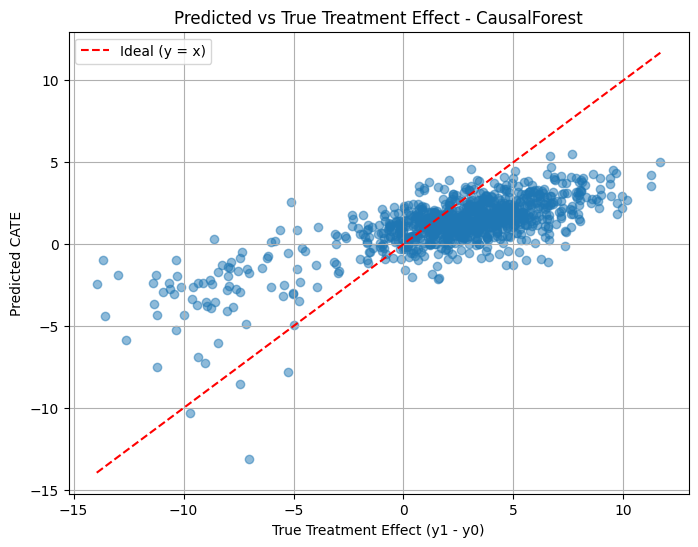

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(true_effect_test, pred_effect_causal, alpha=0.5)
plt.plot([true_effect_test.min(), true_effect_test.max()],
         [true_effect_test.min(), true_effect_test.max()],
         'r--', label="Ideal (y = x)")
plt.xlabel("True Treatment Effect (y1 - y0)")
plt.ylabel("Predicted CATE")
plt.title("Predicted vs True Treatment Effect - CausalForest")
plt.legend()
plt.grid(True)
plt.show()


Црвената испрекината линија е совршена линија y = x – колку повеќе точките се блиску до неа, толку подобар е моделот.

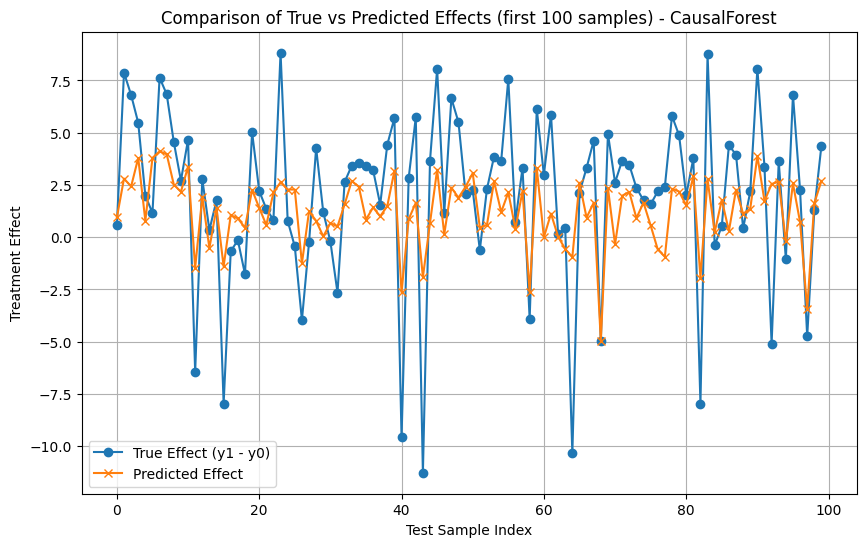

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(true_effect_test[:100], label='True Effect (y1 - y0)', marker='o')
plt.plot(pred_effect_causal[:100], label='Predicted Effect', marker='x')
plt.xlabel("Test Sample Index")
plt.ylabel("Treatment Effect")
plt.title("Comparison of True vs Predicted Effects (first 100 samples) - CausalForest")
plt.legend()
plt.grid(True)
plt.show()


# Дали грешката „RMSE of CATE estimates: 3.110958751266639“ е голема?

RMSE (3.11) кажува колку во просек грешишиме при предвидување на разликата меѓу y1 и y0, односно индивидуалниот ефект на третманот.

Вредностите на вистинскиот ефект (true_effect_test) се движат од -13.95 до 11, што значи дека RMSE од 3.11 претставува релативно умерена грешка.

Средната вредност на ефектите е 2.24, што сугерира дека постои позитивен ефект доколку се прима третманот во однос на тоа да не се прима третманот.



# DOUBLE MACHINE LEARNING

In [33]:
from econml.dml import DML
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
est = DML(model_y=GradientBoostingRegressor(),
          model_t=GradientBoostingRegressor(),
          model_final=LassoCV(fit_intercept=False))


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
est.fit(Y=Y_train,
              T=T_train,
              W=X_train_scaled,
              X=X_train_scaled)

In [36]:
final_model = est.model_final_
coef = final_model.coef_
print(coef)

[ 2.02798425 -0.02766267 -0.         -0.15476103 -0.         -0.
  0.         -0.         -2.93610172  0.         -0.          0.08157005
 -0.         -0.         -0.         -0.         -0.         -0.05325
 -0.         -0.23582874  1.11620566  0.         -0.         -0.14070538
 -0.08893018 -0.          0.         -0.          0.06703431 -0.01824004
 -0.0109638   0.         -0.         -0.          0.         -0.
  0.          0.         -0.04959471 -0.51422666  0.18669315  0.91909757
 -0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.0545401  -0.07634918  0.
 -0.01788622 -0.13985262]


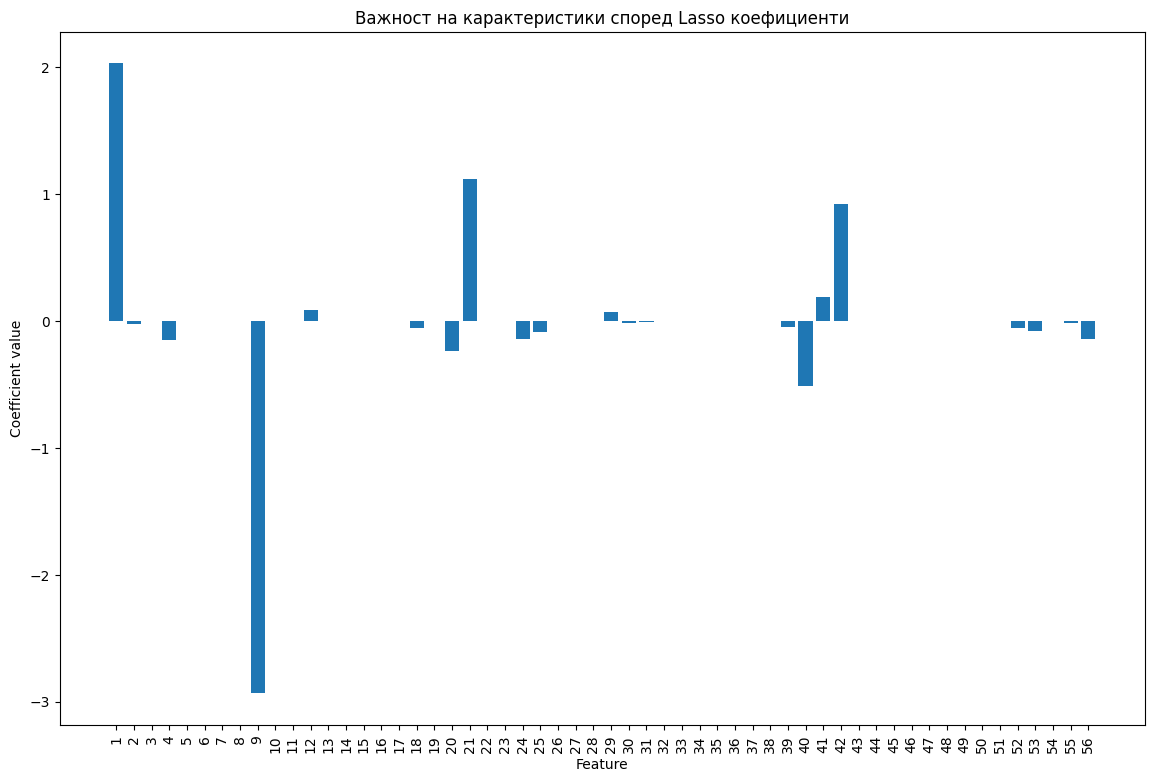

In [37]:
plt.figure(figsize=(14, 9))
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), range(1, len(coef) + 1), rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.title("Важност на карактеристики според Lasso коефициенти")
plt.show()

In [38]:
pred_effect_dml = est.effect(X_test_scaled)

RMSE of CATE estimates: 2.1065


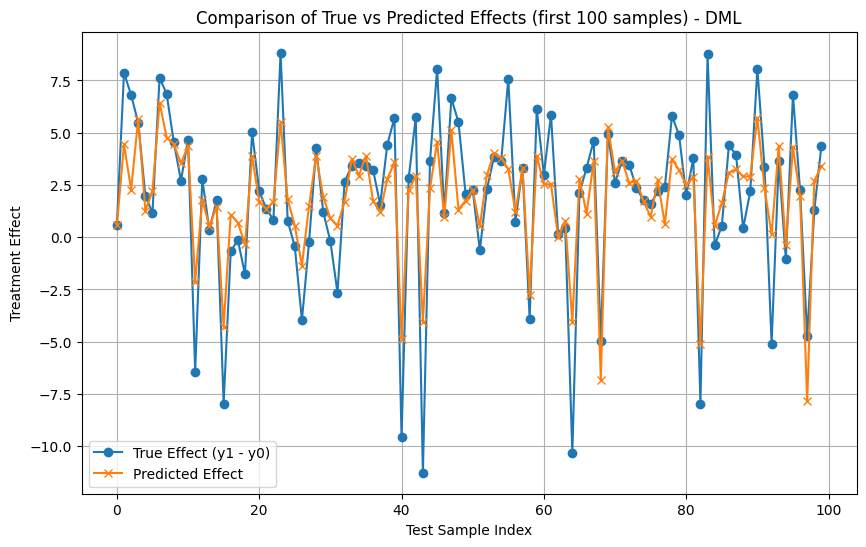

In [39]:
rmse = sqrt(mean_squared_error(true_effect_test, pred_effect_dml))
print(f"RMSE of CATE estimates: {rmse:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(true_effect_test[:100], label='True Effect (y1 - y0)', marker='o')
plt.plot(pred_effect_dml[:100], label='Predicted Effect', marker='x')
plt.xlabel("Test Sample Index")
plt.ylabel("Treatment Effect")
plt.title("Comparison of True vs Predicted Effects (first 100 samples) - DML")
plt.legend()
plt.grid(True)
plt.show()

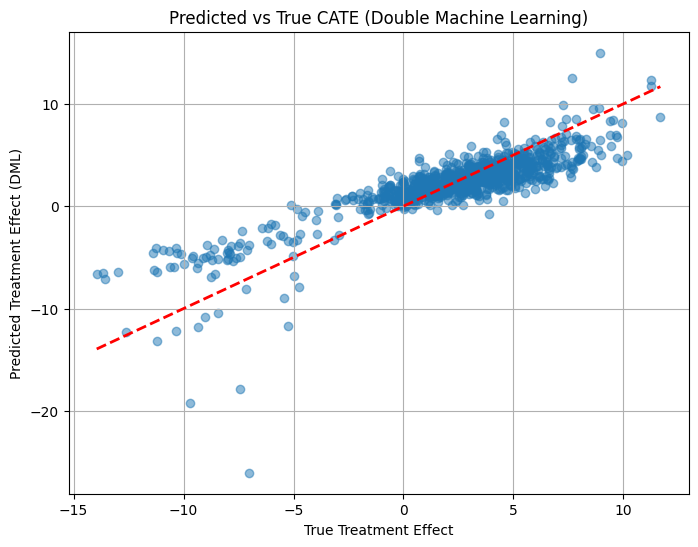

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(true_effect_test, pred_effect_dml, alpha=0.5)
plt.xlabel("True Treatment Effect")
plt.ylabel("Predicted Treatment Effect (DML)")
plt.title("Predicted vs True CATE (Double Machine Learning)")
plt.plot([true_effect_test.min(), true_effect_test.max()],
         [true_effect_test.min(), true_effect_test.max()],
         'r--', lw=2)
plt.grid(True)
plt.show()

# Со DML добиваме многу поточни резултати од CausalForest

# Визуелизација на разликите помеѓу Double Machine Learning и CausalForest

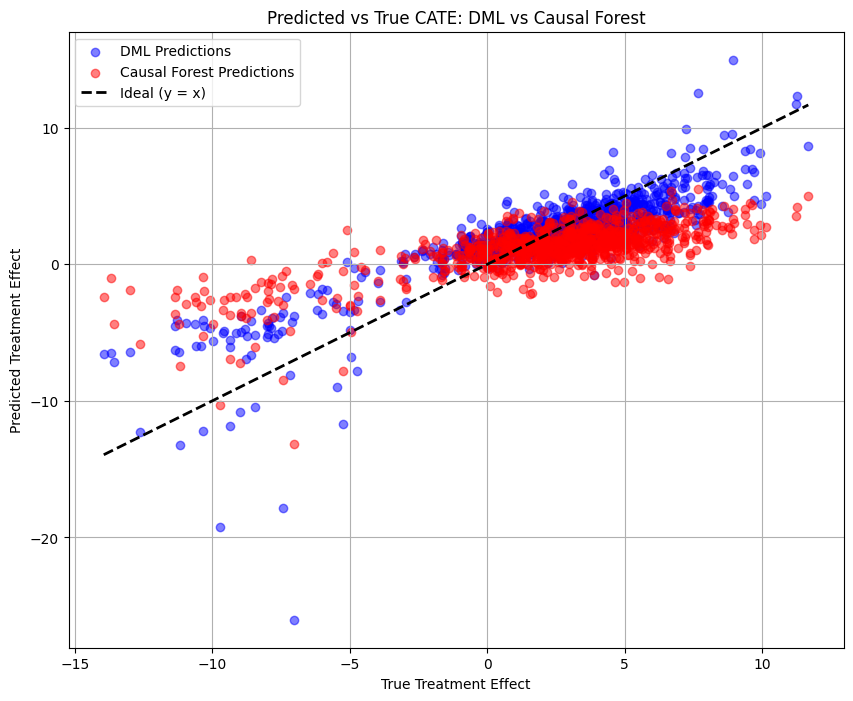

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# DML predictions (blue)
plt.scatter(true_effect_test, pred_effect_dml, alpha=0.5, c='blue', label='DML Predictions')

# Causal Forest predictions (red)
plt.scatter(true_effect_test, pred_effect_causal, alpha=0.5, c='red', label='Causal Forest Predictions')

# Reference line
plt.plot([true_effect_test.min(), true_effect_test.max()],
         [true_effect_test.min(), true_effect_test.max()],
         'k--', lw=2, label="Ideal (y = x)")

plt.xlabel("True Treatment Effect")
plt.ylabel("Predicted Treatment Effect")
plt.title("Predicted vs True CATE: DML vs Causal Forest")
plt.legend()
plt.grid(True)
plt.show()

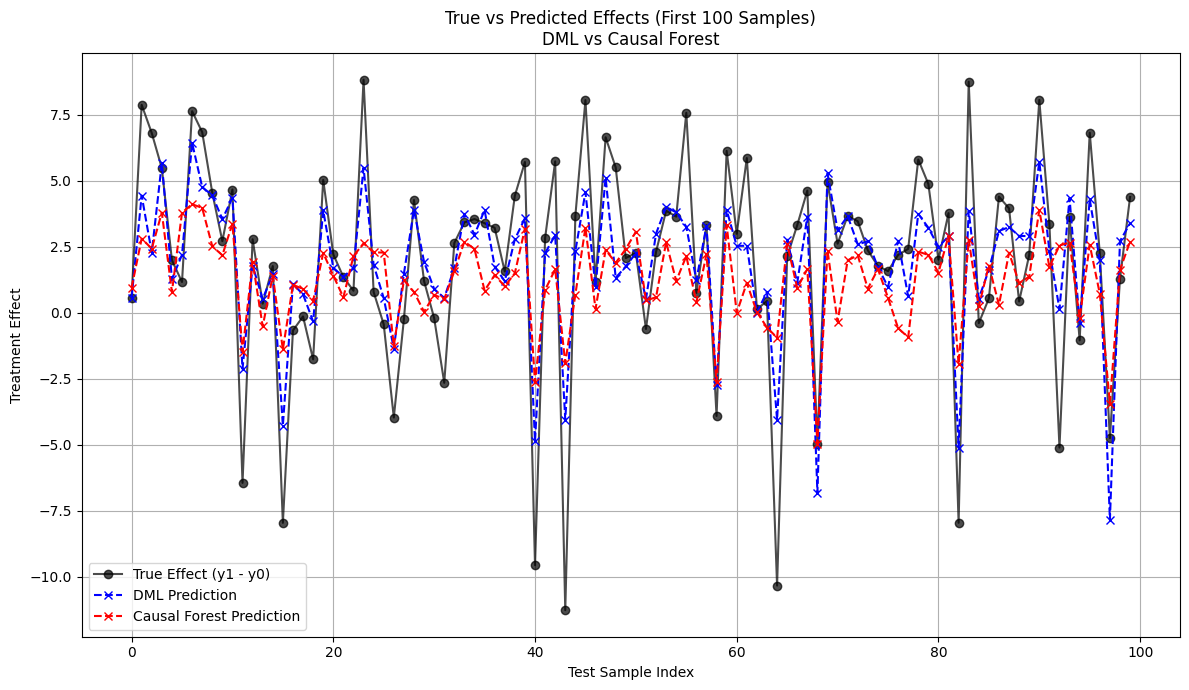

In [42]:
plt.figure(figsize=(12, 7))

# True effect (same for both)
plt.plot(true_effect_test[:100], label='True Effect (y1 - y0)', marker='o', color='black', linestyle='-', alpha=0.7)

# DML predictions (blue)
plt.plot(pred_effect_dml[:100], label='DML Prediction', marker='x', color='blue', linestyle='--')

# Causal Forest predictions (red)
plt.plot(pred_effect_causal[:100], label='Causal Forest Prediction', marker='x', color='red', linestyle='--')

plt.xlabel("Test Sample Index")
plt.ylabel("Treatment Effect")
plt.title("True vs Predicted Effects (First 100 Samples)\nDML vs Causal Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()